In [1]:
# Dependecies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import seaborn as sns

# Import API key
from config import api_key

In [2]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [3]:
from pathlib import Path
import os

# Output File (CSV)
curr_dir = Path(os.getcwd())
outfile = os.path.join(curr_dir, 'output.csv')
print(outfile)

C:\Users\habib\OneDrive\Documents\ANALYTICS\Github\WeatherPy\output.csv


In [4]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat_lng_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name 
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lat_lng_list.append(lat_lng)
        
# Print the city count to confirm sufficient count
city_count = len(cities)
print(city_count)

612


In [6]:
#Perform API Calls

#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

 # Build query URL and request your results in Celsius
base_query_url = f"{url}&units={units}&appid={api_key}&q="

In [7]:
#Create dataframe with list of cities
df = pd.DataFrame(cities)
df = df.rename(columns={0: 'city'})

#Add lat and lngs to dataframe, create separate columns for lats and longs
df['lat_lngs'] = lat_lng_list
df['lat'] = df.lat_lngs.map(lambda x: str(x[0]))
df['long'] = df.lat_lngs.map(lambda x: str(x[1]))

df.head()

,city,lat_lngs,lat,long
0,vinh,"(18.495342231751806, 105.7170262218495)",18.495342231751806,105.7170262218495
1,avesta,"(60.0680114495903, 16.144087647848465)",60.0680114495903,16.144087647848465
2,warqla,"(31.927867775993377, 5.065453466633528)",31.927867775993377,5.065453466633528
3,puerto baquerizo moreno,"(4.006735594219606, -87.47107657300468)",4.006735594219606,-87.47107657300468
4,vila franca do campo,"(38.08201524879573, -19.72549751125092)",38.08201524879573,-19.72549751125092


In [8]:
# Perform API Calls

# Create new columns for data we'll be collecting from the API
df['temp'] = ""
df['max_temp'] = ""
df['humidity'] = ""
df['wind_speed'] = ""
df['clouds'] = ""

# Iterate over each row
for index, row in df.iterrows():
    city = row['city']
    print(f"Processing Record {index + 1} of {city_count} | {city}")
    city = city.replace(" ", "%20")
    query_url = base_query_url + city
    print(query_url)
    weather = requests.get(query_url).json()
    try:
        df.loc[index, 'temp'] = weather['main']['temp']
        df.loc[index, 'max_temp'] = weather['main']['temp_max']
        df.loc[index, 'humidity'] = weather['main']['humidity']
        df.loc[index, 'wind_speed'] = weather['wind']['speed']
        df.loc[index, 'clouds'] = weather['clouds']['all']
    except:
        df.loc[index, 'temp'] = 'city not found'
        df.loc[index, 'humidity'] = 'city not found'
        df.loc[index, 'wind_speed'] = 'city not found'
        df.loc[index, 'clouds'] = 'city not found'
    time.sleep(.50)
    
print("Data Retrieval Complete")


Processing Record 1 of 612 | vinh
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=vinh
Processing Record 2 of 612 | avesta
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=avesta
Processing Record 3 of 612 | warqla
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=warqla
Processing Record 4 of 612 | puerto baquerizo moreno
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=puerto%20baquerizo%20moreno
Processing Record 5 of 612 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=vila%20franca%20do%20campo
Processing Record 6 of 612 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=saint-philippe
Processing Record 7 of 612 | san juan del sur


Processing Record 55 of 612 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=hithadhoo
Processing Record 56 of 612 | avarua
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=avarua
Processing Record 57 of 612 | bethel
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=bethel
Processing Record 58 of 612 | san cristobal
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=san%20cristobal
Processing Record 59 of 612 | jatai
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=jatai
Processing Record 60 of 612 | celendin
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=celendin
Processing Record 61 of 612 | esperance
http://api.openweathermap.org/data/2.5/weather?&units=metric

Processing Record 109 of 612 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=chokurdakh
Processing Record 110 of 612 | codrington
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=codrington
Processing Record 111 of 612 | cabatuan
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=cabatuan
Processing Record 112 of 612 | marathon
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=marathon
Processing Record 113 of 612 | whakatane
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=whakatane
Processing Record 114 of 612 | ketchikan
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=ketchikan
Processing Record 115 of 612 | roald
http://api.openweathermap.org/data/2.5/weathe

Processing Record 164 of 612 | klaksvik
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=klaksvik
Processing Record 165 of 612 | mahebourg
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=mahebourg
Processing Record 166 of 612 | mandalgovi
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=mandalgovi
Processing Record 167 of 612 | acarau
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=acarau
Processing Record 168 of 612 | magadan
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=magadan
Processing Record 169 of 612 | hirara
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=hirara
Processing Record 170 of 612 | port-cartier
http://api.openweathermap.org/data/2.5/weather?&units=

Processing Record 218 of 612 | sug-aksy
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=sug-aksy
Processing Record 219 of 612 | adwa
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=adwa
Processing Record 220 of 612 | airai
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=airai
Processing Record 221 of 612 | bojnurd
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=bojnurd
Processing Record 222 of 612 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=bandarbeyla
Processing Record 223 of 612 | talnakh
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=talnakh
Processing Record 224 of 612 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?&units=me

Processing Record 273 of 612 | parakou
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=parakou
Processing Record 274 of 612 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=saint-augustin
Processing Record 275 of 612 | kaitangata
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=kaitangata
Processing Record 276 of 612 | charagua
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=charagua
Processing Record 277 of 612 | felidhoo
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=felidhoo
Processing Record 278 of 612 | luau
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=luau
Processing Record 279 of 612 | orlik
http://api.openweathermap.org/data/2.5/weather?&uni

Processing Record 327 of 612 | kahului
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=kahului
Processing Record 328 of 612 | delijan
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=delijan
Processing Record 329 of 612 | jumla
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=jumla
Processing Record 330 of 612 | rudnogorsk
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=rudnogorsk
Processing Record 331 of 612 | tidore
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=tidore
Processing Record 332 of 612 | gat
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=gat
Processing Record 333 of 612 | ilulissat
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6

Processing Record 381 of 612 | sosnovo-ozerskoye
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=sosnovo-ozerskoye
Processing Record 382 of 612 | baruun-urt
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=baruun-urt
Processing Record 383 of 612 | half moon bay
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=half%20moon%20bay
Processing Record 384 of 612 | harper
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=harper
Processing Record 385 of 612 | te anau
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=te%20anau
Processing Record 386 of 612 | axim
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=axim
Processing Record 387 of 612 | zlobin
http://api.openweathermap.org/da

Processing Record 434 of 612 | azul
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=azul
Processing Record 435 of 612 | bubaque
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=bubaque
Processing Record 436 of 612 | faanui
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=faanui
Processing Record 437 of 612 | phalaborwa
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=phalaborwa
Processing Record 438 of 612 | kupang
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=kupang
Processing Record 439 of 612 | sena madureira
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=sena%20madureira
Processing Record 440 of 612 | vao
http://api.openweathermap.org/data/2.5/weather?&units=metri

Processing Record 488 of 612 | siguiri
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=siguiri
Processing Record 489 of 612 | pajan
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=pajan
Processing Record 490 of 612 | graaff-reinet
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=graaff-reinet
Processing Record 491 of 612 | luderitz
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=luderitz
Processing Record 492 of 612 | junagarh
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=junagarh
Processing Record 493 of 612 | marsa matruh
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=marsa%20matruh
Processing Record 494 of 612 | meyungs
http://api.openweathermap.org/data/2.5/weat

Processing Record 543 of 612 | ruhengeri
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=ruhengeri
Processing Record 544 of 612 | saint-francois
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=saint-francois
Processing Record 545 of 612 | sitka
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=sitka
Processing Record 546 of 612 | matara
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=matara
Processing Record 547 of 612 | babanusah
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=babanusah
Processing Record 548 of 612 | haibowan
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=haibowan
Processing Record 549 of 612 | royan
http://api.openweathermap.org/data/2.5/weather?&uni

Processing Record 597 of 612 | muros
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=muros
Processing Record 598 of 612 | kungurtug
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=kungurtug
Processing Record 599 of 612 | kuybyshevo
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=kuybyshevo
Processing Record 600 of 612 | pop
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=pop
Processing Record 601 of 612 | thinadhoo
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=thinadhoo
Processing Record 602 of 612 | hellvik
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=c90be6a5036f7bfd2c304cb0c6ee4c18&q=hellvik
Processing Record 603 of 612 | begoro
http://api.openweathermap.org/data/2.5/weather?&units=metric&appid

In [9]:
#Remove any cities that could not be found from the dataframe
df = df[df['temp'] != 'city not found']

#Check that there are still 500+ records
len(df)


559

In [10]:
#Convert lat from string to float object
df['lat'] = df['lat'].astype(float)
# df['lat'].dtype


df['long'] = df['long'].astype(float)
df['temp'] = df['temp'].astype(float)
df['max_temp'] = df['max_temp'].astype(float)
df['humidity'] = df['humidity'].astype(int)
df['wind_speed'] = df['wind_speed'].astype(float)
df['clouds'] = df['clouds'].astype(int)


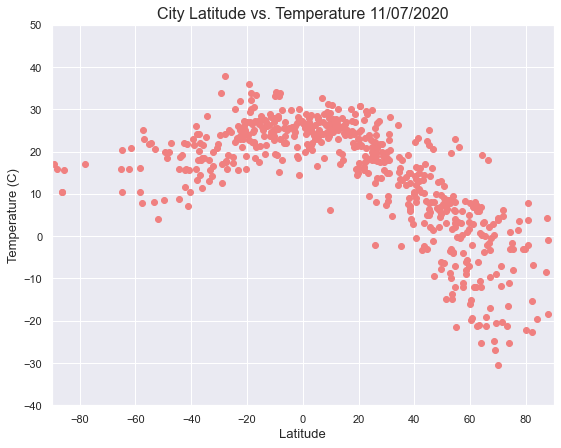

In [11]:
# Create a Latitude vs Temperature Plot

#Pull in today's date for graphs
date = datetime.date.today()
date = time.strftime("%m/%d/%Y")

sns.set()
plt.figure(figsize=(9,7))
plt.scatter(df['lat'], df['temp'], color = 'lightcoral')
plt.title(f"City Latitude vs. Temperature {date}", fontsize="16")
plt.xlabel("Latitude", fontsize="13")
plt.ylabel("Temperature (C)", fontsize="13")
plt.ylim(-40, 50)
plt.xlim(-90, 90)

plt.savefig("Latitude vs Temperature.png")

plt.show()

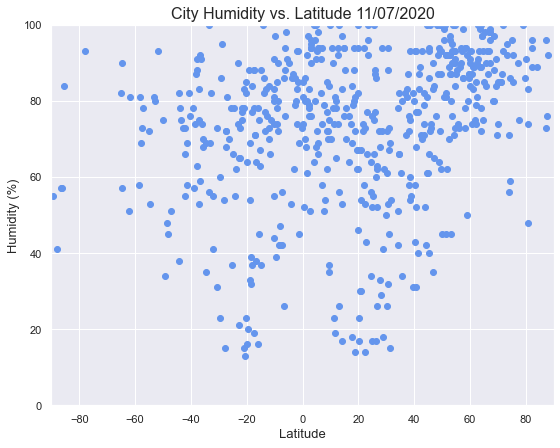

In [12]:
# Create a Humidity (%) vs Latitude Plot

#Pull in today's date for graphs
date = datetime.date.today()
date = time.strftime("%m/%d/%Y")

sns.set()
plt.figure(figsize=(9,7))
plt.scatter(df['lat'], df['humidity'], color = 'cornflowerblue')
plt.title(f"City Humidity vs. Latitude {date}", fontsize="16")
plt.xlabel("Latitude", fontsize="13")
plt.ylabel("Humidity (%)", fontsize="13")
plt.ylim(0, 100)
plt.xlim(-90, 90)

plt.savefig("Latitude vs Humidity.png")

plt.show()


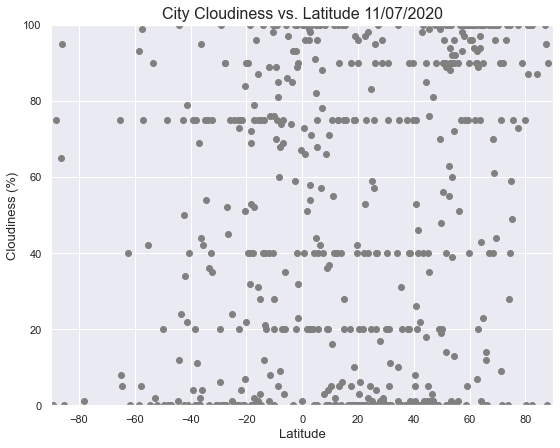

In [13]:
# Create a Cloudiness (%) vs Latitude Plot

#Pull in today's date for graphs
date = datetime.date.today()
date = time.strftime("%m/%d/%Y")

sns.set()
plt.figure(figsize=(9,7))
plt.scatter(df['lat'], df['clouds'], color = 'grey')
plt.title(f"City Cloudiness vs. Latitude {date}", fontsize="16")
plt.xlabel("Latitude", fontsize="13")
plt.ylabel("Cloudiness (%)", fontsize="13")
plt.ylim(0, 100)
plt.xlim(-90, 90)

plt.savefig("Latitude vs Cloudiness.png")

plt.show()

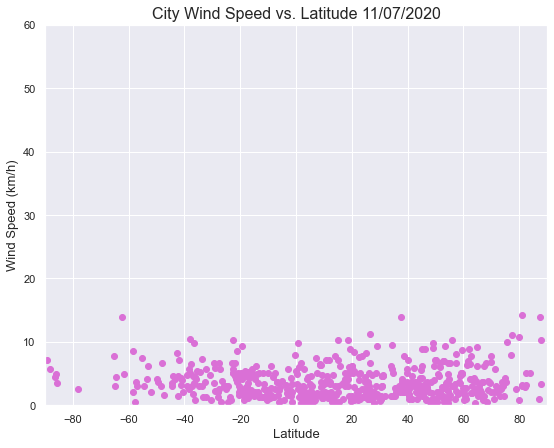

In [14]:
# Create a Wind Speed (mph) vs Latitude Plot

#Pull in today's date for graphs
date = datetime.date.today()
date = time.strftime("%m/%d/%Y")

sns.set()
plt.figure(figsize=(9,7))
plt.scatter(df['lat'], df['wind_speed'], color = 'orchid')
plt.title(f"City Wind Speed vs. Latitude {date}", fontsize="16")
plt.xlabel("Latitude", fontsize="13")
plt.ylabel("Wind Speed (km/h)", fontsize="13")
plt.ylim(0, 60)
plt.xlim(-90, 90)

plt.savefig("Latitude vs Wind Speed.png")

plt.show()

In [15]:
# output the csv
df.to_csv(outfile)